In [1]:
%load_ext autoreload
%autoreload 2

In [102]:
from __init__ import *
import numpy as np
from export.saver import read_pickle, save_pickle
from read.svg_reader import SVGReader
from helpers.helpers import filter_none
from placement2.attract import *
from visuals.plotter import plot_general
from copy import deepcopy
import networkx as nx
from itertools import pairwise, accumulate, product
from functools import reduce
from operator import add

In [3]:
case  = "amber_a_f01.svg"
sv = SVGReader(case)
sv.run()
# ag = AdjacencyGenerator(sv.layout, buffer_size=0.17)
# ag.run() # TODO shouldnt run if sv.layout is empty
# ag.draw_graph()
domains = sv.layout.domains


In [17]:
pos = {k:( float(v.x.min), float(v.y.min))for k,v in domains.items()}
pos

{'bedroom_1': (0.0, 3.29),
 'kitchen': (3.36, 0.0),
 'm_bath': (5.3, 4.79),
 'm_bedroom': (7.8, 3.35),
 'm_closet': (8.93, 2.69),
 'bath': (5.3, 3.35),
 'dining': (5.42, 0.0),
 'transit_space': (3.36, 2.41),
 'closet': (8.93, -0.05),
 'bedroom_2': (0.0, 0.0),
 'laundry': (3.38, 4.31)}

In [4]:

plot_general(sv.layout.domains)


In [106]:
G  = create_graph(domains)
G

In [107]:
sizes = get_distances(G)
sizes

[('bedroom_1', 'transit_space', Decimal('0.14')),
 ('bedroom_1', 'laundry', Decimal('0.16')),
 ('bedroom_1', 'dining', Decimal('0.40')),
 ('bedroom_1', 'm_bath', Decimal('0.48')),
 ('bedroom_1', 'm_bedroom', Decimal('0.46')),
 ('bedroom_1', 'bath', Decimal('0.28')),
 ('bedroom_1', 'closet', Decimal('0.55')),
 ('bedroom_1', 'm_closet', Decimal('0.55')),
 ('bedroom_2', 'transit_space', Decimal('0.14')),
 ('bedroom_2', 'kitchen', Decimal('0.14')),
 ('bedroom_2', 'dining', Decimal('0.40')),
 ('bedroom_2', 'm_bedroom', Decimal('0.46')),
 ('bedroom_2', 'bath', Decimal('0.28')),
 ('bedroom_2', 'closet', Decimal('0.55')),
 ('bedroom_2', 'm_closet', Decimal('0.55'))]

{('bedroom_1',
  'transit_space'): Text(1.6800087192468345, 2.849997716387734, '0.14'),
 ('bedroom_1', 'laundry'): Text(1.6900210265931679, 3.800006345303262, '0.16'),
 ('transit_space',
  'bath'): Text(4.329970780080185, 2.8799858418945226, '0.14'),
 ('transit_space',
  'dining'): Text(4.390011384284589, 1.2049866814923007, '0.26'),
 ('laundry', 'bath'): Text(4.340033589303493, 3.8299832053482517, '0.32'),
 ('laundry', 'm_bath'): Text(4.340027218163012, 4.550006804540754, '0.32'),
 ('bedroom_2',
  'transit_space'): Text(1.680014050696045, 1.2050100780290085, '0.14'),
 ('bedroom_2', 'kitchen'): Text(1.6799918447993698, 0.0, '0.14'),
 ('kitchen', 'dining'): Text(4.38998730991967, 0.0, '0.26'),
 ('bath', 'm_bedroom'): Text(6.550040129525588, 3.3500000000000005, '0.18'),
 ('m_bath', 'm_bedroom'): Text(6.549993129458745, 4.070003957431763, '0.18'),
 ('dining', 'closet'): Text(7.174963469979122, -0.024999479629332244, '0.15'),
 ('dining', 'm_closet'): Text(7.174976709195182, 1.3449821503518

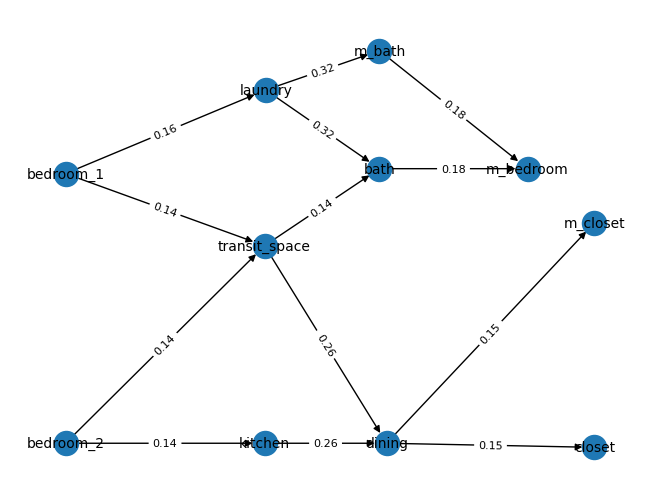

In [33]:
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G,pos, labels={n: n for n in G},font_size=10)
edge_labels = nx.get_edge_attributes(G, 'size')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

In [57]:
[i for i in nx.topological_generations(G)]

[['bedroom_1', 'bedroom_2'],
 ['laundry', 'transit_space', 'kitchen'],
 ['m_bath', 'bath', 'dining'],
 ['m_bedroom', 'closet', 'm_closet']]

In [68]:
from collections import defaultdict
sources = defaultdict(set)
for v, source in g2.nodes(data="source"):
    sources[source].add(v)

In [69]:
g2 = nx.dag_to_branching(G)
for source, nodes in sources.items():
    for v in nodes:
        g2.nodes[v].update(G.nodes[source])

In [74]:
g2.nodes[19]

{'source': 'm_closet'}

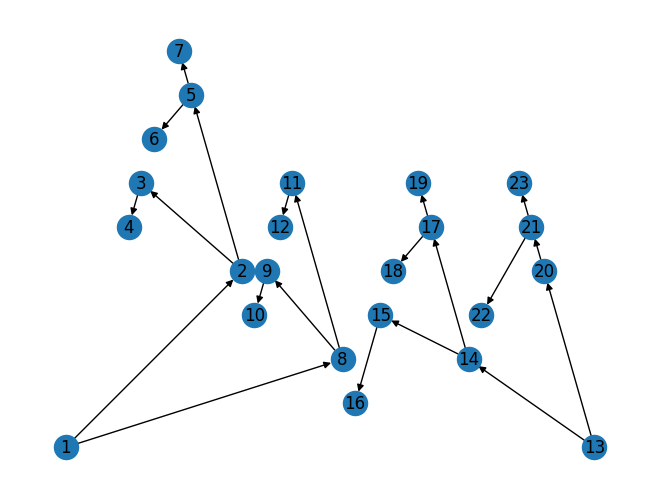

In [70]:
nx.draw_planar(g2, with_labels=True)

NetworkXError: Node 1 has no position.

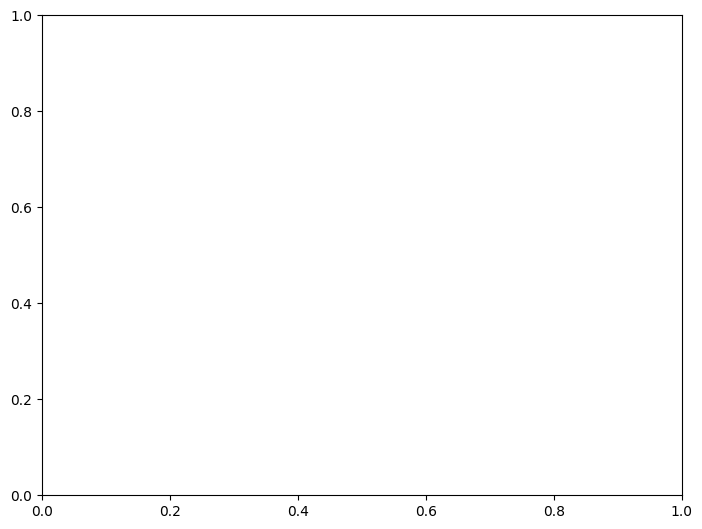

In [62]:
from placement2.attract import draw_digraph




In [38]:
[i for i in nx.all_simple_paths(G, "bedroom_1", "m_bath")]

[['bedroom_1', 'laundry', 'm_bath']]

In [11]:
G.edges

OutEdgeView([('bedroom_1', 'transit_space'), ('bedroom_1', 'laundry'), ('transit_space', 'bath'), ('transit_space', 'dining'), ('laundry', 'bath'), ('laundry', 'm_bath'), ('bedroom_2', 'transit_space'), ('bedroom_2', 'kitchen'), ('kitchen', 'dining'), ('bath', 'm_bedroom'), ('m_bath', 'm_bedroom'), ('dining', 'closet'), ('dining', 'm_closet')])

In [121]:
new_domains = deepcopy(domains)
for item in result:
    k,v = list(item.keys())[0], list(item.values())[0]
    sz = v.size
    print(sz)
    new_domains[k] = domains[k].modify(lambda x: x-sz, axis="x")

0.14
0.16
0.14
0.14
0.32
0.32
0.26
0.14
0.26
0.18
0.18
0.15
0.15


In [122]:
plot_general(new_domains)

In [60]:
sz  = nb_ranges2["bedroom_1"]["transit_space"].size


In [65]:
domains["transit_space"].modify(lambda x: x-sz, axis="x")

Domain(transit_space, x=[3.22-5.02], y=[2.41-4.19])